Explained Variance:
[0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative Explained Variance: [0.72962445 0.95813207 0.99482129 1.        ]


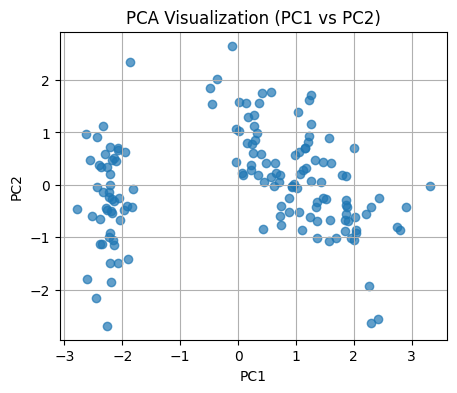

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


x = load_iris().data  # shape (150, 4)

def standarize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

x = standarize(x)

def pca_eig(x):
    cov = x.T @ x / (x.shape[0] - 1)
    eigvals, eigvecs = np.linalg.eig(cov)
    idx = np.argsort(eigvals)[::-1] # sort in descending order
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    # cov = eigvecs @ eigvals @ eigvecs.T
    p = eigvecs
    # compute explained variance
    explained_variance = eigvals / np.sum(eigvals)
    return p, explained_variance

def pca_svd(x):
    u, s, vh = np.linalg.svd(x) # shapes (150, 150), (4,), (4, 4)
    p = vh.T
    explained_variance = s**2 / np.sum(s**2)
    return p, explained_variance


basis, explained_variance = pca_eig(x)

basis2, explained_variance2 = pca_svd(x)


assert (np.vectorize(lambda x1, x2: np.abs(x1 @ x2), signature='(m),(n)->()')(basis.T, basis2.T) > 0.999).all()
np.testing.assert_allclose(explained_variance, explained_variance2, atol=1e-10)


print('Explained Variance:')
print(explained_variance)
print('Cumulative Explained Variance:', np.cumsum(explained_variance))

plt.figure(figsize=(5, 4))
simp = x @ basis[:, :2] # = (basis^-1 @ x.T).T = (basis.T @ x.T).T
plt.scatter(simp[:, 0], simp[:, 1], alpha=0.7)
plt.title('PCA Visualization (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

